<a href="https://colab.research.google.com/github/Nikhitha-Vineeth/GIT-NIK/blob/master/simpleRNNandLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from tensorflow.keras.layers import Input, SimpleRNN, Dense
from tensorflow.keras.models import Model

# Define example values for n and p
n = 10  # Length of the input sequence (e.g., 10 time steps)
p = 5   # Number of features in each time step
hsize = 8  # Number of hidden units in the RNN layer
osize = 3  # Number of output classes

# Define the input shape
input = Input(shape=(n, p))

# Add a SimpleRNN layer
h = SimpleRNN(hsize, return_sequences=True)(input)

# Add a Dense layer with softmax activation
output = Dense(osize, activation='softmax')(h)

# Define the model
model = Model(inputs=input, outputs=output)

# Display the model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 10, 8)          │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10, 3)          │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139 (556.00 B)

 Trainable params: 139 (556.00 B)

 Non-trainable params: 0 (0.00 B)

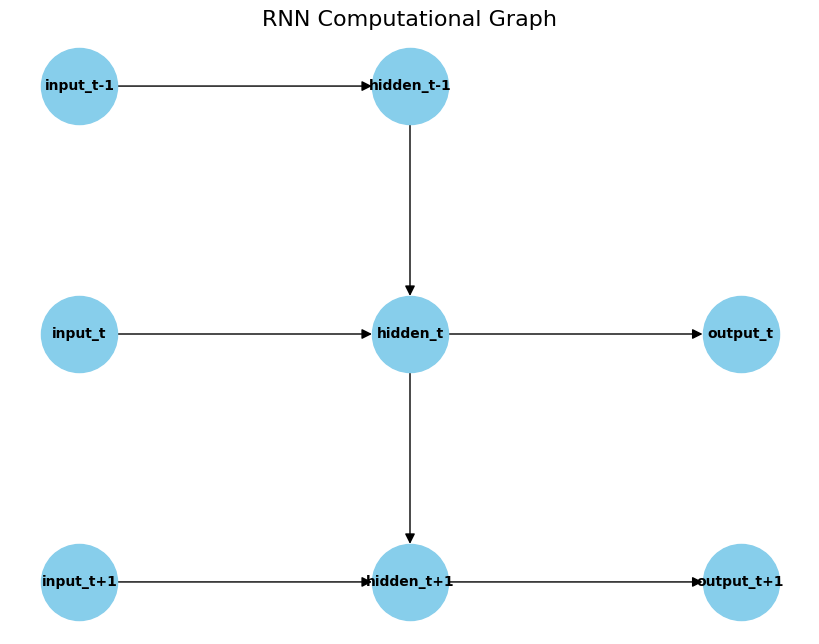

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Define nodes for the RNN
nodes = {
    "input_t-1": (0, 2),
    "hidden_t-1": (1, 2),
    "input_t": (0, 1),
    "hidden_t": (1, 1),
    "output_t": (2, 1),
    "input_t+1": (0, 0),
    "hidden_t+1": (1, 0),
    "output_t+1": (2, 0)
}

# Add nodes with positions
for node, pos in nodes.items():
    G.add_node(node, pos=pos)

# Define edges for the RNN
edges = [
    ("input_t-1", "hidden_t-1"),
    ("hidden_t-1", "hidden_t"),
    ("input_t", "hidden_t"),
    ("hidden_t", "output_t"),
    ("hidden_t", "hidden_t+1"),
    ("input_t+1", "hidden_t+1"),
    ("hidden_t+1", "output_t+1")
]

# Add edges
G.add_edges_from(edges)

# Get positions for plotting
pos = nx.get_node_attributes(G, 'pos')

# Plot the graph
plt.figure(figsize=(8, 6))
nx.draw(
    G, pos, with_labels=True, node_size=3000,
    node_color="skyblue", font_size=10, font_weight="bold", arrowsize=15
)
plt.title("RNN Computational Graph", fontsize=16)
plt.show()


In [ ]:
#One to One


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN


model = Sequential([
    SimpleRNN(10, input_shape=(1, 1)),  # Input shape: (timesteps, features)
    Dense(1, activation='sigmoid')     # Single output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

none - batch size- at a time how much steps it takes the input data

parameter of NN- value that the model learns from the training process...(i/p x o/p) + bias ...here it learns 120 values which are the weight adjusted characteristics.

epoc inu otuput go to as input as next stage.- fully connected layer
dense is equivalent to the fully connected layer

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, RepeatVector, TimeDistributed

# One-to-Many RNN
model = Sequential([
    Dense(10, activation='relu', input_shape=(1,)),  # Single input
    RepeatVector(5),                                 # Repeat input 5 times (timesteps)
    SimpleRNN(10, return_sequences=True),            # RNN layer for sequence output
    TimeDistributed(Dense(1, activation='sigmoid'))  # Output a sequence
])

model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 5, 10)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 5, 10)          │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 5, 1)           │            11 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, TimeDistributed

# Many-to-Many RNN (Equal lengths)
model = Sequential([
    SimpleRNN(10, return_sequences=True, input_shape=(5, 1)),  # Input shape: (timesteps, features)
    TimeDistributed(Dense(1, activation='sigmoid'))           # Sequence output
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)        │ (None, 5, 10)          │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 5, 1)           │            11 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

uploaded = files.upload()
data = pd.read_csv('airline-passengers.csv')


Saving airline-passengers.csv to airline-passengers (1).csv


Index(['total_passengers'], dtype='object')


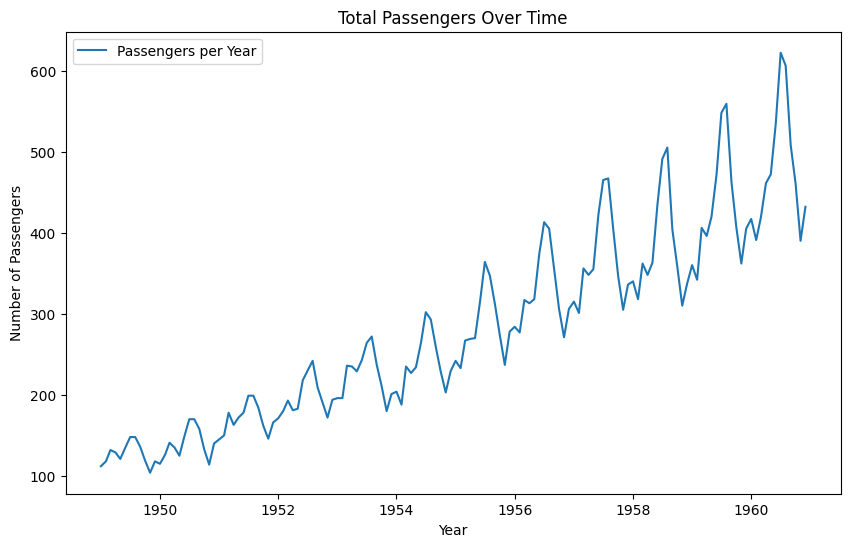

In [ ]:
# Assuming the column containing year information is 'month'
# Convert the 'month' column to datetime, assuming format is Year-Month ('%Y-%m')
data['month'] = pd.to_datetime(data['month'], format='%Y-%m')
data.set_index('month', inplace=True) # Set 'month' as index

# Print the column names to verify the change
print(data.columns)

# Extract the total_passengers column
series = data['total_passengers']

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(series, label='Passengers per Year')
plt.title('Total Passengers Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Split data into train and test sets
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]